#Direktori Dari G-drive, **Skip kalau ga pake Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


#Ambil Data dari Kaggle

In [ ]:
!kaggle datasets download -d deadskull7/fer2013

In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  fer2013.zip
  inflating: fer2013.csv             


#Membuat Model Prediksi

In [ ]:
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator ,load_img


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random


In [ ]:
#Importing Data from CSV file
fer2013=pd.read_csv("fer2013.csv")

In [ ]:
labels=fer2013.iloc[:,[0]].values

In [ ]:
pixels=fer2013['pixels']

In [ ]:
#Facial Expressions
Ekspresi={0:"Marah",1:"Jijik",2:"Takut",3:"Senang",4:"Sedih",5:"Terkejut",6:"Netral"}
from keras.utils import to_categorical 
labels = to_categorical(labels,len(Ekspresi))

In [ ]:
#converting pixels to Gray Scale images of 48X48 
image = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
image = image/255.0
image = image.reshape(image.shape[0],48,48,1).astype('float32')

'Jijik'

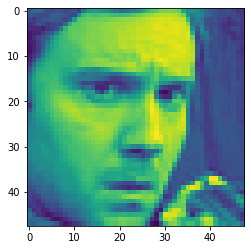

In [ ]:
plt.imshow(image[0][:,:,0])
Ekspresi[labels[0][0]]

In [ ]:
#splitting data into training and test data
train_features,test_features,train_labels,test_labels = train_test_split(image,labels,test_size=0.2,random_state=0)

In [ ]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
def cnn_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [ ]:
classes=7
model = cnn_model(classes)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 21, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0

In [ ]:
#train the CNN 
model.fit(train_features,train_labels,batch_size=105,epochs=40,verbose=2)

Epoch 1/40
274/274 - 38s - loss: 1.8891 - accuracy: 0.3261
Epoch 2/40
274/274 - 5s - loss: 1.4820 - accuracy: 0.4415
Epoch 3/40
274/274 - 5s - loss: 1.3263 - accuracy: 0.4941
Epoch 4/40
274/274 - 5s - loss: 1.2179 - accuracy: 0.5370
Epoch 5/40
274/274 - 5s - loss: 1.1492 - accuracy: 0.5651
Epoch 6/40
274/274 - 5s - loss: 1.0860 - accuracy: 0.5913
Epoch 7/40
274/274 - 5s - loss: 1.0323 - accuracy: 0.6117
Epoch 8/40
274/274 - 5s - loss: 0.9909 - accuracy: 0.6266
Epoch 9/40
274/274 - 5s - loss: 0.9330 - accuracy: 0.6505
Epoch 10/40
274/274 - 5s - loss: 0.8784 - accuracy: 0.6702
Epoch 11/40
274/274 - 5s - loss: 0.8128 - accuracy: 0.6994
Epoch 12/40
274/274 - 5s - loss: 0.7659 - accuracy: 0.7165
Epoch 13/40
274/274 - 5s - loss: 0.7093 - accuracy: 0.7351
Epoch 14/40
274/274 - 5s - loss: 0.6558 - accuracy: 0.7592
Epoch 15/40
274/274 - 5s - loss: 0.6020 - accuracy: 0.7799
Epoch 16/40
274/274 - 5s - loss: 0.5433 - accuracy: 0.8000
Epoch 17/40
274/274 - 5s - loss: 0.5048 - accuracy: 0.8143
Epoch

In [ ]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")